In [215]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [216]:
os.getcwd()

'c:\\Users\\marci\\dev\\DAFT_0116_OTALORAMarcia\\Module_1\\Project_Week_3_Data-Preparation\\scripts'

### Functions used in the cleaning

In [217]:
def check_if_float(x):
    try:
        float(x)
        return True
    except:
        return False

In [218]:
def check_extra_info(x, colum_w_info = "metros", flag_column = "check_metros"):
    if x[flag_column]:
        textinfo = x[colum_w_info].strip() #Strippin any possible spaces before and after
        if "con ascen" in textinfo:
            return textinfo.split("con ascen")[0].strip()
        elif "sin ascen" in textinfo:
            return textinfo.split("sin ascen")[0].strip()
        else:
            return -1 #No info on elevator
    else:
        return -1 #No information

In [219]:
def check_if_ascensor(x, colum_w_info = "metros", flag_column = "check_metros"):
    if x[flag_column]:
        textinfo = x[colum_w_info].strip() #Strippin any possible spaces before and after
        if "con ascen" in textinfo:
            return 1
        elif "sin ascen" in textinfo:
            return 0
        else:
            return -1 #No info on elevator
    else:
        return -1 #No information


In [220]:
def checking_separator(x):
    if np.isnan(float(x)):
        return np.nan
    else:
        x= str(x)
        if len(x.split(".")[-1]) == 3:
            x = x.replace(".","") 
        return float(x)

FUNCTIONS FOR OUTLIERS

In [221]:
def outliers_3sigma(colvalue, meancol, stdcol):
    if (colvalue>(meancol+3*stdcol)) or (colvalue<(meancol-3*stdcol)):
        return 1
    else:
        return 0
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

def outliers_IQR(columnvalues,q25,q75,iqr):
    if (columnvalues>(q75+1.5*iqr)) or (columnvalues<(q25-1.5*iqr)):
        return 1
    else:
        return 0

In [222]:
df = pd.read_excel("../data/10 -Spain renting.xlsx") #Add None if reading all SHEETs in excel file

#### Getting basic info on type and Null values

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79749 entries, 0 to 79748
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Column1                    79749 non-null  int64  
 1   provincia                  79747 non-null  object 
 2   comunidad autonoma         79742 non-null  object 
 3   titulo                     79741 non-null  object 
 4   precio                     79745 non-null  float64
 5   habitaciones               76042 non-null  float64
 6   metros                     79734 non-null  object 
 7   total inmuebles/comunidad  79749 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.9+ MB


#### Showing main statistics

In [224]:
df.describe()

,Column1,precio,habitaciones,total inmuebles/comunidad
count,79749.000000,79745.000000,76042.000000,79749.000000
mean,39874.000000,1253.113223,2.476184,6342.473009
std,23021.697646,1660.283555,1.417935,6502.701913
min,0.000000,0.000000,0.000000,0.000000
25%,19937.000000,630.000000,2.000000,1465.000000
50%,39874.000000,900.000000,2.000000,3115.000000
75%,59811.000000,1360.000000,3.000000,9455.000000
max,79748.000000,100000.000000,230.000000,17589.000000


In [225]:
df.head(10)

,Column1,provincia,comunidad autonoma,titulo,precio,habitaciones,metros,total inmuebles/comunidad
0,0,La Coruña,Galicia,NaN,NaN,NaN,NaN,1751
1,1,La Coruña,Galicia,"Chalet pareado en A Zapateira, Culleredo",1100.0,4.0,243,1751
2,2,La Coruña,Galicia,"Chalet pareado en Elviña - A Zapateira, A Coruña",1100.0,4.0,243,1751
3,3,La Coruña,Galicia,"Ático en avenida Pasaxe, 35, Los Castros - Cas...",450.0,NaN,Planta 4ª exterior con ascen,1751
4,4,La Coruña,Galicia,"Piso en calle de Fernando III o Santo, 9, Ensa...",1000.0,4.0,100,1751
5,5,La Coruña,Galicia,"Piso en calle Manuel Jesús Méndez Búa, s/n, Ca...",450.0,2.0,76,1751
6,6,La Coruña,Galicia,"Piso en Os Mallos, A Coruña",800.0,4.0,100,1751
7,7,La Coruña,Galicia,"Piso en ronda de Outeiro, Agra del Orzán - Ven...",650.0,3.0,122,1751
8,8,La Coruña,Galicia,"Piso en travesía de Meicende, Suevos-Pastoriza...",400.0,4.0,107,1751
9,9,La Coruña,Galicia,"Piso en calle Concepción Arenal, 50, Centro, F...",800.0,2.0,75,1751


### 1st step : Standarizing columns names and dropping columns with No information

In [226]:
df.drop(labels="Column1", axis=1, inplace=True)

In [227]:
df.columns

Index(['provincia', 'comunidad autonoma', 'titulo', 'precio', 'habitaciones',
       'metros', 'total inmuebles/comunidad'],
      dtype='object')

In [228]:
df.rename(columns={'comunidad autonoma':"comunidad_autonoma", 'total inmuebles/comunidad':'total_inmuebles_p_comunidad'}, inplace=True)

In [229]:
df.head()

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad
0,La Coruña,Galicia,NaN,NaN,NaN,NaN,1751
1,La Coruña,Galicia,"Chalet pareado en A Zapateira, Culleredo",1100.0,4.0,243,1751
2,La Coruña,Galicia,"Chalet pareado en Elviña - A Zapateira, A Coruña",1100.0,4.0,243,1751
3,La Coruña,Galicia,"Ático en avenida Pasaxe, 35, Los Castros - Cas...",450.0,NaN,Planta 4ª exterior con ascen,1751
4,La Coruña,Galicia,"Piso en calle de Fernando III o Santo, 9, Ensa...",1000.0,4.0,100,1751


### 2nd step: Check for Duplicated rows

In [230]:
perc_duplicated = df[df.duplicated()].shape[0]/df.shape[0]
print(f"{perc_duplicated*100:.2f} % of duplicated rows")

41.28 % of duplicated rows


In [231]:
df_nodup = df[~df.duplicated(keep="last")]
df_nodup.reset_index(drop=True,inplace=True)

In [232]:
df[df.duplicated(keep=False)].head(10)

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad
16,La Coruña,Galicia,"Piso en avenida de Villagarcía, Ensanche - Sar...",750.0,3.0,95,1751
75,La Coruña,Galicia,"Piso en calle Alameda, Ensanche, A Coruña",800.0,3.0,66,1751
77,La Coruña,Galicia,"Piso en Eusebio da Guarda, 17, Os Mallos, A Co...",600.0,2.0,75,1751
213,La Coruña,Galicia,"Piso en calle Javier Fonte, 2, Monte Alto - Za...",650.0,4.0,110,1751
249,La Coruña,Galicia,"Casa o chalet independiente en calle Juno, Per...",2500.0,4.0,260,1751
325,La Coruña,Galicia,"Piso en plaza Xeneral Azcárraga, Ciudad Vieja ...",1100.0,2.0,119,1751
327,La Coruña,Galicia,"Piso en plaza Xeneral Azcárraga, Ciudad Vieja ...",1100.0,2.0,119,1751
335,La Coruña,Galicia,"Casa o chalet independiente en calle Juno, Per...",2500.0,4.0,260,1751
374,La Coruña,Galicia,"Piso en calle Enrique Dequidt Hevia, 15, Juan ...",1250.0,3.0,140,1751
379,La Coruña,Galicia,"Piso en calle Alameda, Ensanche, A Coruña",800.0,3.0,66,1751


In [233]:
df_nodup

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad
0,La Coruña,Galicia,NaN,NaN,NaN,NaN,1751
1,La Coruña,Galicia,"Chalet pareado en A Zapateira, Culleredo",1100.0,4.0,243,1751
2,La Coruña,Galicia,"Chalet pareado en Elviña - A Zapateira, A Coruña",1100.0,4.0,243,1751
3,La Coruña,Galicia,"Ático en avenida Pasaxe, 35, Los Castros - Cas...",450.0,NaN,Planta 4ª exterior con ascen,1751
4,La Coruña,Galicia,"Piso en calle de Fernando III o Santo, 9, Ensa...",1000.0,4.0,100,1751
...,...,...,...,...,...,...,...
46820,Zaragoza,Aragon,"Piso en avenida De San Jose, 15, La Granja, Za...",890.0,3.0,90,1277
46821,Zaragoza,Aragon,"Piso en calle Del parque, 40, Pinares de Venec...",550.0,2.0,70,1277
46822,Zaragoza,Aragon,"Piso en callejón del Perro, 14, La Magdalena, ...",680.0,2.0,45,1277
46823,Zaragoza,Aragon,"Piso en calle Almagro, 10, Doctor Cerrada, Zar...",600.0,1.0,55,1277


### 3 Step : Some rows do not contain any information about a property ( no title, no price, no rooms, no surface). I assume it is a bad entry

In [234]:
df_nodup[(df_nodup["titulo"].isnull())&(df_nodup["precio"].isnull())&(df_nodup["habitaciones"].isnull())&(df_nodup["metros"].isnull())]

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad
0,La Coruña,Galicia,NaN,NaN,NaN,NaN,1751
23074,Huesca,Aragon,NaN,NaN,NaN,NaN,260
46786,NaN,NaN,NaN,NaN,NaN,NaN,1277


### Dropping rows that do not have the fields 

In [235]:
df_nodup = df_nodup[~((df_nodup["titulo"].isnull())&(df_nodup["precio"].isnull())&(df_nodup["habitaciones"].isnull())&(df_nodup["metros"].isnull()))]
df_nodup.reset_index(inplace=True, drop=True)


In [236]:
df_nodup["comunidad_autonoma"] = df_nodup["comunidad_autonoma"].str.lower() 

C:\Users\marci\AppData\Local\Temp\ipykernel_12404\1378507591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup["comunidad_autonoma"] = df_nodup["comunidad_autonoma"].str.lower()


### 4 step. Check how many NaNs per columns and which percentage

In [237]:
for col in df_nodup.columns:
    nancount = df[col].isnull().sum()
    print(nancount)
    print(f"Percantage of NaNs values for column: {col} is {100*(nancount/df_nodup.shape[0]):.2f}")

2
Percantage of NaNs values for column: provincia is 0.00
7
Percantage of NaNs values for column: comunidad_autonoma is 0.01
8
Percantage of NaNs values for column: titulo is 0.02
4
Percantage of NaNs values for column: precio is 0.01
3707
Percantage of NaNs values for column: habitaciones is 7.92
15
Percantage of NaNs values for column: metros is 0.03
0
Percantage of NaNs values for column: total_inmuebles_p_comunidad is 0.00


Only one columns with significative nan percentage --> Habitaciones (~%8). But this may not be so important for the price

### 5 Step Columns Metros is numeric but some entries  are a description so we need to filter these and correct

In [238]:
#First convert to string to check if float
df_nodup["metros"] = df_nodup["metros"].astype(str)

C:\Users\marci\AppData\Local\Temp\ipykernel_12404\1760318247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup["metros"] = df_nodup["metros"].astype(str)


Create flag column for easier identify

In [239]:
df_nodup["check_metros"] = df_nodup["metros"].apply(check_if_float)

C:\Users\marci\AppData\Local\Temp\ipykernel_12404\4075395624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup["check_metros"] = df_nodup["metros"].apply(check_if_float)


In [240]:
df_nodup[df_nodup["check_metros"]==False].head(20)

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,check_metros
2,La Coruña,galicia,"Ático en avenida Pasaxe, 35, Los Castros - Cas...",450.0,NaN,Planta 4ª exterior con ascen,1751,False
64,La Coruña,galicia,"Estudio en pexigo de arriba, Ensanche - Sar, S...",600.0,NaN,Bajo exterior sin ascen,1751,False
99,La Coruña,galicia,"Estudio en Pexigo de Abaixo, 4, Ensanche - Sar...",450.0,NaN,Bajo exterior sin ascen,1751,False
107,La Coruña,galicia,"Estudio en calle Perillana, Ensanche, A Coruña",530.0,NaN,Planta 3ª exterior con ascen,1751,False
121,La Coruña,galicia,"Ático en plaza Tabares, 1, Monte Alto - Zalaet...",650.0,NaN,Planta 5ª exterior con ascen,1751,False
334,La Coruña,galicia,"Estudio en calle da Cortaduría, 3, Ciudad Viej...",800.0,NaN,Bajo exterior sin ascen,1751,False
399,La Coruña,galicia,"Estudio en Tabares, Monte Alto - Zalaeta - Ato...",650.0,NaN,Planta 5ª exterior con ascen,1751,False
530,La Coruña,galicia,"Estudio en calle Washington, 14, Monte Alto - ...",750.0,1.0,Bajo exterior sin ascen,1751,False
685,La Coruña,galicia,"Estudio en calle do Pexigo de Arriba, 31, Ensa...",600.0,NaN,Entreplanta exterior sin ascen,1751,False
687,La Coruña,galicia,"Estudio en calle dos Pelamios, 16, Campus nort...",475.0,NaN,Planta 1ª exterior sin ascen,1751,False


Some of the fields in the "metros" column contain extra information such as elevator or additional details which may be useful for other users

In [241]:
df_nodup["ascensor"] = df_nodup.apply(check_if_ascensor, args=("metros", "check_metros"), axis=1)

C:\Users\marci\AppData\Local\Temp\ipykernel_12404\2948706090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup["ascensor"] = df_nodup.apply(check_if_ascensor, args=("metros", "check_metros"), axis=1)


In [242]:
df_nodup["additional_info"] = df_nodup.apply(check_extra_info, args=("metros", "check_metros"), axis=1)

C:\Users\marci\AppData\Local\Temp\ipykernel_12404\2207118648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup["additional_info"] = df_nodup.apply(check_extra_info, args=("metros", "check_metros"), axis=1)


In [243]:
df_nodup["metros"] = np.where(df_nodup["check_metros"], df_nodup["metros"], np.nan)

C:\Users\marci\AppData\Local\Temp\ipykernel_12404\635799031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup["metros"] = np.where(df_nodup["check_metros"], df_nodup["metros"], np.nan)


Checking if metros measurement has values inferior to legal minimum surface ( 10 m2)

In [244]:
df_nodup[df_nodup["metros"].astype(float)<10]

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,check_metros,ascensor,additional_info
2372,Alicante,comunidad valenciana,"Casa o chalet independiente en Bruselas, Altea...",15000.0,6.0,1.060,3115,True,-1,-1
2581,Alicante,comunidad valenciana,"Casa o chalet independiente en Cometa-Carrió, ...",10000.0,6.0,1.089,3115,True,-1,-1
2813,Alicante,comunidad valenciana,"Casa o chalet independiente en Altea la Vella,...",14900.0,6.0,1.039,3115,True,-1,-1
3146,Alicante,comunidad valenciana,"Casa o chalet independiente en Cometa-Carrió, ...",10000.0,5.0,1.089,3115,True,-1,-1
3492,Alicante,comunidad valenciana,"Piso en Ensanche-Diputación, Alicante / Alacant",6000.0,8.0,1.500,3115,True,-1,-1
...,...,...,...,...,...,...,...,...,...,...
42487,Valencia,comunidad valenciana,"Piso en calle del Pintor Maella, s/n, Penya-Ro...",860.0,3.0,1.032,3711,True,-1,-1
43013,Valencia,comunidad valenciana,Casa o chalet independiente en calle Santa Bár...,10000.0,9.0,1.180,3711,True,-1,-1
43075,Valencia,comunidad valenciana,Casa o chalet independiente en Rocafort,10000.0,8.0,1.272,3711,True,-1,-1
44225,Vizcaya,pais vasco,Casa rural en Muxika,4800.0,30.0,1.334,1465,True,-1,-1


The data seems to indicate that there is a mistake in the character used as a decimal separator (based on the price and surface)

In [245]:
df_nodup["metros"] = df_nodup["metros"].apply(lambda x: checking_separator(x))
df_nodup.loc[2372,"metros"]


C:\Users\marci\AppData\Local\Temp\ipykernel_12404\326237059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup["metros"] = df_nodup["metros"].apply(lambda x: checking_separator(x))


1060.0

After correcting inputs with wrong decimal places we get only 1 unlikely input

In [246]:
df_nodup[df_nodup["metros"] <10]

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,check_metros,ascensor,additional_info
23306,Jaen,andalucia,"Piso en Huesa centro, s/n, Huesa",250.0,1.0,1.0,623,True,-1,-1


In [247]:
df_nodup.head(20)

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,check_metros,ascensor,additional_info
0,La Coruña,galicia,"Chalet pareado en A Zapateira, Culleredo",1100.0,4.0,243.0,1751,True,-1,-1
1,La Coruña,galicia,"Chalet pareado en Elviña - A Zapateira, A Coruña",1100.0,4.0,243.0,1751,True,-1,-1
2,La Coruña,galicia,"Ático en avenida Pasaxe, 35, Los Castros - Cas...",450.0,NaN,NaN,1751,False,-1,-1
3,La Coruña,galicia,"Piso en calle de Fernando III o Santo, 9, Ensa...",1000.0,4.0,100.0,1751,True,-1,-1
4,La Coruña,galicia,"Piso en calle Manuel Jesús Méndez Búa, s/n, Ca...",450.0,2.0,76.0,1751,True,-1,-1
5,La Coruña,galicia,"Piso en Os Mallos, A Coruña",800.0,4.0,100.0,1751,True,-1,-1
6,La Coruña,galicia,"Piso en ronda de Outeiro, Agra del Orzán - Ven...",650.0,3.0,122.0,1751,True,-1,-1
7,La Coruña,galicia,"Piso en travesía de Meicende, Suevos-Pastoriza...",400.0,4.0,107.0,1751,True,-1,-1
8,La Coruña,galicia,"Piso en calle Concepción Arenal, 50, Centro, F...",800.0,2.0,75.0,1751,True,-1,-1
9,La Coruña,galicia,"Piso en calle da Pía, Castiñeiriño - Cruceiro ...",450.0,3.0,99.0,1751,True,-1,-1


#### Step 6 Check most commont words in Title to check if there is classes already

First filter empty inputs where there is no title. Since there are only 4 rows we droppped them

In [248]:
df_nodup[df_nodup["titulo"].isnull()]

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,check_metros,ascensor,additional_info
23086,Huesca,NaN,NaN,425.0,1.0,65.0,260,True,-1,-1
23087,Huesca,NaN,NaN,375.0,NaN,NaN,260,False,-1,-1
46778,Zaragoza,NaN,NaN,350.0,2.0,110.0,1277,True,-1,-1
46779,Zaragoza,NaN,NaN,1500.0,4.0,135.0,1277,True,-1,-1


In [249]:
df_nodup = df_nodup[~df_nodup["titulo"].isnull()]
df_nodup.reset_index(inplace=True, drop=True)

In [250]:
df_nodup.head()

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,check_metros,ascensor,additional_info
0,La Coruña,galicia,"Chalet pareado en A Zapateira, Culleredo",1100.0,4.0,243.0,1751,True,-1,-1
1,La Coruña,galicia,"Chalet pareado en Elviña - A Zapateira, A Coruña",1100.0,4.0,243.0,1751,True,-1,-1
2,La Coruña,galicia,"Ático en avenida Pasaxe, 35, Los Castros - Cas...",450.0,NaN,NaN,1751,False,-1,-1
3,La Coruña,galicia,"Piso en calle de Fernando III o Santo, 9, Ensa...",1000.0,4.0,100.0,1751,True,-1,-1
4,La Coruña,galicia,"Piso en calle Manuel Jesús Méndez Búa, s/n, Ca...",450.0,2.0,76.0,1751,True,-1,-1


We can extract type of property from the "titulo" column and the address

In [251]:
df_nodup["extract_type"]= df_nodup.apply(lambda x: x["titulo"].split(",")[0].split("en")[0].strip().lower(), axis=1)

In [252]:
df_nodup["extract_address"]= df_nodup.apply(lambda x: x["titulo"].split("en ")[-1].strip(), axis=1)

In [253]:
df_nodup["extract_type"]

0        chalet pareado
1        chalet pareado
2                 ático
3                  piso
4                  piso
              ...      
46813              piso
46814              piso
46815              piso
46816              piso
46817              piso
Name: extract_type, Length: 46818, dtype: object

In [254]:
df_nodup["extract_type"].unique()

array(['chalet pareado', 'ático', 'piso', 'dúplex', 'casa o chalet indep',
       'estudio', 'chalet adosado', 'chalet', 'casa rural',
       'casa de pueblo', 'finca rústica', 'casa terrera', 'torre',
       'masía', 'palacio', 'cortijo', 'casa rústica', 'caserón',
       'castillo'], dtype=object)

In [255]:
df_nodup["type_property_main"] = df_nodup["extract_type"].apply(lambda x: x.split()[0])
df_nodup["type_property_sec"] = df_nodup["extract_type"].apply(lambda x: x.split()[-1] if len(x.split())>1 else np.nan)


In [256]:
df_nodup

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,check_metros,ascensor,additional_info,extract_type,extract_address,type_property_main,type_property_sec
0,La Coruña,galicia,"Chalet pareado en A Zapateira, Culleredo",1100.0,4.0,243.0,1751,True,-1,-1,chalet pareado,"A Zapateira, Culleredo",chalet,pareado
1,La Coruña,galicia,"Chalet pareado en Elviña - A Zapateira, A Coruña",1100.0,4.0,243.0,1751,True,-1,-1,chalet pareado,"Elviña - A Zapateira, A Coruña",chalet,pareado
2,La Coruña,galicia,"Ático en avenida Pasaxe, 35, Los Castros - Cas...",450.0,NaN,NaN,1751,False,-1,-1,ático,"avenida Pasaxe, 35, Los Castros - Castrillón, ...",ático,NaN
3,La Coruña,galicia,"Piso en calle de Fernando III o Santo, 9, Ensa...",1000.0,4.0,100.0,1751,True,-1,-1,piso,"calle de Fernando III o Santo, 9, Ensanche - S...",piso,NaN
4,La Coruña,galicia,"Piso en calle Manuel Jesús Méndez Búa, s/n, Ca...",450.0,2.0,76.0,1751,True,-1,-1,piso,"calle Manuel Jesús Méndez Búa, s/n, Carral",piso,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46813,Zaragoza,aragon,"Piso en avenida De San Jose, 15, La Granja, Za...",890.0,3.0,90.0,1277,True,-1,-1,piso,"avenida De San Jose, 15, La Granja, Zaragoza",piso,NaN
46814,Zaragoza,aragon,"Piso en calle Del parque, 40, Pinares de Venec...",550.0,2.0,70.0,1277,True,-1,-1,piso,"calle Del parque, 40, Pinares de Venecia, Zara...",piso,NaN
46815,Zaragoza,aragon,"Piso en callejón del Perro, 14, La Magdalena, ...",680.0,2.0,45.0,1277,True,-1,-1,piso,"callejón del Perro, 14, La Magdalena, Zaragoza",piso,NaN
46816,Zaragoza,aragon,"Piso en calle Almagro, 10, Doctor Cerrada, Zar...",600.0,1.0,55.0,1277,True,-1,-1,piso,"calle Almagro, 10, Doctor Cerrada, Zaragoza",piso,NaN


In [257]:
df_nodup.drop(labels=["extract_type", "check_metros"],axis=1,inplace=True)

In [258]:
df_nodup.head()

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec
0,La Coruña,galicia,"Chalet pareado en A Zapateira, Culleredo",1100.0,4.0,243.0,1751,-1,-1,"A Zapateira, Culleredo",chalet,pareado
1,La Coruña,galicia,"Chalet pareado en Elviña - A Zapateira, A Coruña",1100.0,4.0,243.0,1751,-1,-1,"Elviña - A Zapateira, A Coruña",chalet,pareado
2,La Coruña,galicia,"Ático en avenida Pasaxe, 35, Los Castros - Cas...",450.0,NaN,NaN,1751,-1,-1,"avenida Pasaxe, 35, Los Castros - Castrillón, ...",ático,NaN
3,La Coruña,galicia,"Piso en calle de Fernando III o Santo, 9, Ensa...",1000.0,4.0,100.0,1751,-1,-1,"calle de Fernando III o Santo, 9, Ensanche - S...",piso,NaN
4,La Coruña,galicia,"Piso en calle Manuel Jesús Méndez Búa, s/n, Ca...",450.0,2.0,76.0,1751,-1,-1,"calle Manuel Jesús Méndez Búa, s/n, Carral",piso,NaN


#### Check for un realistic meters per property

Text(0, 0.5, 'Mean meters per properties per comune')

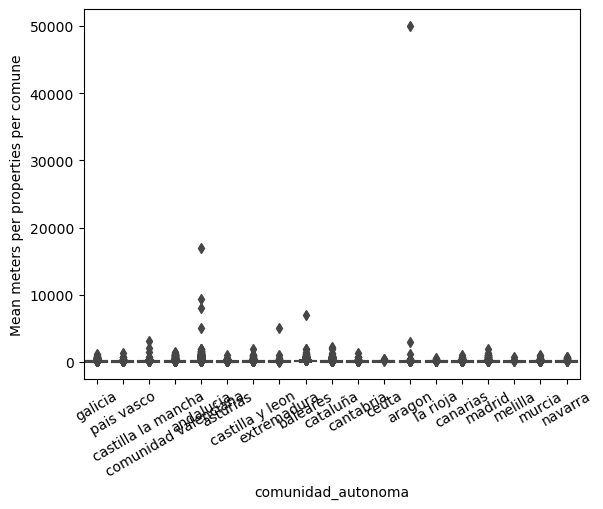

In [259]:
ax = sns.boxplot(data=df_nodup, x="comunidad_autonoma", y="metros")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_ylabel("Mean meters per properties per comune")

In [260]:
df_nodup.metros = df_nodup.metros.astype(float)

In [261]:
df_nodup[df_nodup["metros"]<10]

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec
23304,Jaen,andalucia,"Piso en Huesa centro, s/n, Huesa",250.0,1.0,1.0,623,-1,-1,"Huesa centro, s/n, Huesa",piso,NaN


In [262]:
df_nodup[df_nodup["metros"]>10000]

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec
20324,Granada,andalucia,"Piso en carretera Granada, Güéjar-Sierra",5700.0,3.0,16991.0,3051,-1,-1,"carretera Granada, Güéjar-Sierra",piso,NaN
23049,Huesca,aragon,"Piso en calle Escuelas, 10, Biscarrués",350.0,0.0,50000.0,260,-1,-1,"calle Escuelas, 10, Biscarrués",piso,NaN


Index 23049 seems to have an incorrect input for "metros" compared to the indicated price

In [263]:
df_nodup[df_nodup["provincia"]=="Huesca"].sort_values(by="precio",ascending=True)

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec
23058,Huesca,aragon,"Dúplex en Urbanización Espata R5, 13, Villanúa",0.0,2.0,57.0,4444,-1,-1,"Urbanización Espata R5, 13, Villanúa",dúplex,NaN
23055,Huesca,aragon,"Piso en calle de Francia, 12, Sallent de Gallego",0.0,4.0,122.0,260,-1,-1,"calle de Francia, 12, Sallent de Gallego",piso,NaN
22966,Huesca,aragon,"Chalet en calle Balsa la Algayo, Tamarite de L...",200.0,3.0,18.0,260,-1,-1,"calle Balsa la Algayo, Tamarite de Litera",chalet,NaN
23347,Huesca,andalucia,Casa o chalet independiente en calle Río Guada...,270.0,1.0,100.0,623,-1,-1,"calle Río Guadalete, 34, Martos",casa,indep
23067,Huesca,aragon,"Estudio en calle Canton, 2, Poblaciones norte,...",280.0,NaN,NaN,260,-1,-1,"calle Canton, 2, Poblaciones norte, Jaca",estudio,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23020,Huesca,aragon,"Casa de pueblo en camino de los Plans, 10, Sal...",1900.0,3.0,120.0,260,-1,-1,"camino de los Plans, 10, Sallent de Gallego",casa,pueblo
23013,Huesca,aragon,"Chalet adosado en calle la Iglesia, 3, Sallent...",2000.0,3.0,100.0,260,-1,-1,"calle la Iglesia, 3, Sallent de Gallego",chalet,adosado
22978,Huesca,aragon,"Casa de pueblo en calle l'ausin, 10, Poblacion...",2000.0,3.0,100.0,260,-1,-1,"calle l'ausin, 10, Poblaciones norte, Jaca",casa,pueblo
22900,Huesca,aragon,Casa o chalet independiente en camino de Saras...,2000.0,3.0,215.0,260,-1,-1,"camino de Saras, Panticosa",casa,indep


<AxesSubplot: >

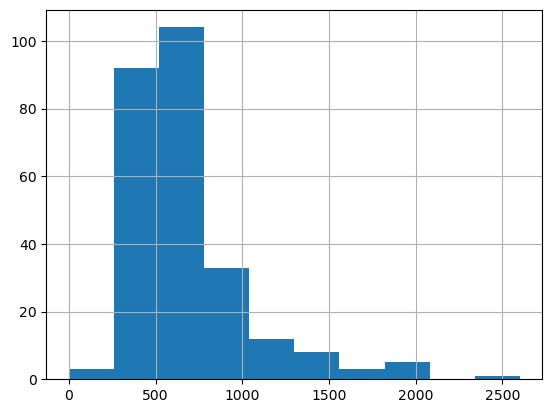

In [264]:
df_nodup[df_nodup["provincia"]=="Huesca"]["precio"].hist()

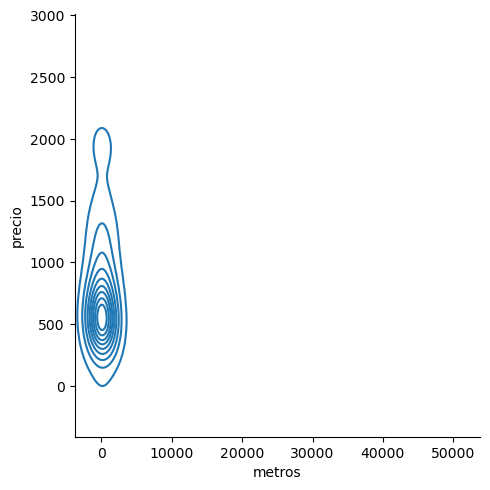

In [265]:
sns.displot(data=df_nodup[df_nodup["provincia"]=="Huesca"], x="metros", y="precio", kind="kde")


Since it is a flat ("piso") it is possible that this is a mistake in the inpyt of meters, specially for the price (350). We can eliminate the record since it is 1 in 260 or check other property values

The input of 50000 is exaggerated compared to the other price surface relation seen over the same region.

In [266]:
df_nodup.drop(index=23049, inplace=True)

In [267]:
df_nodup[df_nodup["metros"]>10000]

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec
20324,Granada,andalucia,"Piso en carretera Granada, Güéjar-Sierra",5700.0,3.0,16991.0,3051,-1,-1,"carretera Granada, Güéjar-Sierra",piso,NaN


Checking prices similarly

In [268]:
print("Min values for price is " + str(df_nodup["precio"].min()))
print("Max values for price is " + str(df_nodup["precio"].max()))

Min values for price is 0.0
Max values for price is 100000.0


Check distribution for price

<AxesSubplot: xlabel='comunidad_autonoma', ylabel='precio'>

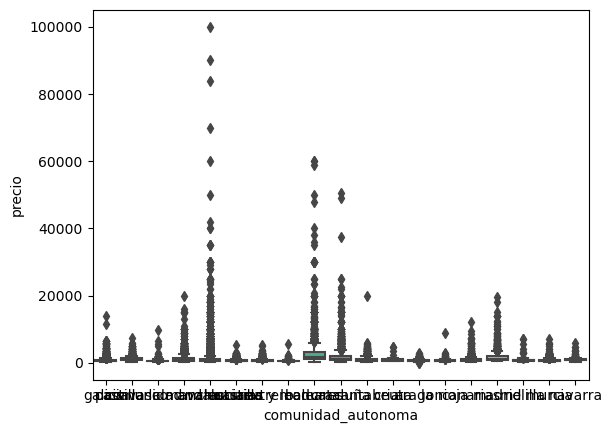

In [269]:
sns.boxplot(data= df_nodup, y="precio",x="comunidad_autonoma")

In [270]:
df_nodup[df_nodup["precio"]<10]

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec
23055,Huesca,aragon,"Piso en calle de Francia, 12, Sallent de Gallego",0.0,4.0,122.0,260,-1,-1,"calle de Francia, 12, Sallent de Gallego",piso,NaN
23058,Huesca,aragon,"Dúplex en Urbanización Espata R5, 13, Villanúa",0.0,2.0,57.0,4444,-1,-1,"Urbanización Espata R5, 13, Villanúa",dúplex,NaN


Replacing by NaN values where price is zero

In [271]:
df_nodup["precio"] = np.where(df_nodup["precio"]<10, np.nan, df_nodup["precio"])

In [272]:
df_nodup[df_nodup["precio"]<10]

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec


### Step 6 Analyse data for outliers

To understand outliers we focused on groupby analysis by comunidad

#### Show number of properties per comunidad

In [273]:
df_nodup.groupby("comunidad_autonoma").count().iloc[:,0].sort_values(ascending=False)

comunidad_autonoma
andalucia               11698
castilla y leon          4749
comunidad valenciana     4330
galicia                  3775
cataluña                 3284
canarias                 2648
baleares                 2256
pais vasco               2004
castilla la mancha       1999
murcia                   1936
madrid                   1773
asturias                 1752
aragon                   1643
cantabria                1254
extremadura               776
navarra                   447
la rioja                  359
melilla                   101
ceuta                      30
Name: provincia, dtype: int64

Text(0, 0.5, 'Number of properties per comune')

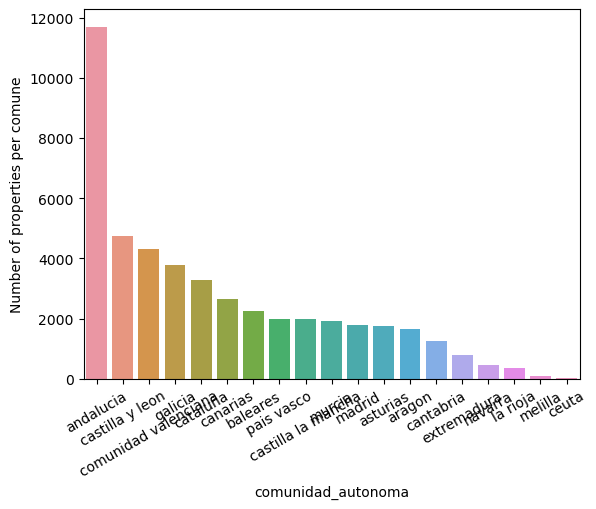

In [274]:
order_bars = df_nodup.groupby("comunidad_autonoma").count().iloc[:,0].sort_values(ascending=False).index
ax = sns.countplot(data=df_nodup, x="comunidad_autonoma",order=order_bars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_ylabel("Number of properties per comune")


C:\Users\marci\AppData\Local\Temp\ipykernel_12404\2327454873.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_bars = df_nodup.groupby("comunidad_autonoma").mean().loc[:,"precio"].sort_values(ascending=False).index


Text(0, 0.5, 'Mean price per commune')

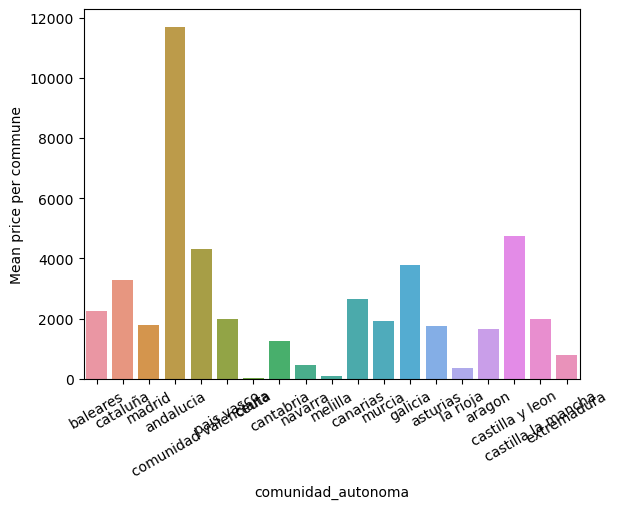

In [275]:
order_bars = df_nodup.groupby("comunidad_autonoma").mean().loc[:,"precio"].sort_values(ascending=False).index
ax = sns.countplot(data=df_nodup, x="comunidad_autonoma",order=order_bars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_ylabel("Mean price per commune")

In [276]:
df_nodup.groupby([ "comunidad_autonoma","provincia","type_property_main"]).count().loc[:,["titulo"]].sort_values(by = "titulo",ascending=False)

titulo
comunidad_autonoma provincia type_property_main        
asturias           Asturias  piso                  1557
castilla y leon    Salamanca piso                  1556
murcia             Murcia    piso                  1438
cataluña           Barcelona piso                  1426
andalucia          Granada   piso                  1423
...                                                 ...
                   Jaen      caserón                  1
cataluña           Lerida    masía                    1
                   Gerona    palacio                  1
aragon             Teruel    caserón                  1
castilla y leon    Leon      masía                    1

[382 rows x 1 columns]

In [277]:
df_nodup.groupby([ "comunidad_autonoma","provincia","type_property_main"]).mean().sort_values(by="precio",ascending=False)

C:\Users\marci\AppData\Local\Temp\ipykernel_12404\2628285569.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_nodup.groupby([ "comunidad_autonoma","provincia","type_property_main"]).mean().sort_values(by="precio",ascending=False)


,,,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info
comunidad_autonoma,provincia,type_property_main,,,,,,
andalucia,Malaga,casa,9932.210345,4.500000,467.613793,3809.0,-1.0,-1.0
cataluña,Barcelona,finca,9245.000000,8.000000,2291.000000,9455.0,-1.0,-1.0
madrid,Madrid,casa,6907.555556,5.688889,583.933333,17589.0,-1.0,-1.0
baleares,Islas Baleares,casa,6293.164491,3.953003,335.537859,2317.0,-1.0,-1.0
cataluña,Barcelona,casa,6169.882353,4.858824,396.141176,9455.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...
andalucia,Huesca,casa,270.000000,1.000000,100.000000,623.0,-1.0,-1.0
asturias,Asturias,finca,250.000000,2.000000,54.000000,2470.0,-1.0,-1.0
castilla la mancha,Cuenca,castillo,200.000000,3.000000,NaN,115.0,-1.0,-1.0


#### Identify outliers by comune by type

Standarized indicator: precio_metro to compared between zones and regions

In [278]:
df_nodup["precio_sqm"] = df_nodup.apply(lambda x: x["precio"]/x["metros"] if np.isfinite(x["metros"]) else np.nan, axis=1)

In [279]:
grouped_df =  df_nodup.groupby([ "comunidad_autonoma","type_property_main"])#.agg({"precio":[q1,q3]})


In [280]:
list_outliers = []
for igroup, gdf in grouped_df:
    q25 = q1(gdf["precio_sqm"])
    q75 = q3(gdf["precio_sqm"])
    iqr = q75 - q25
    mean_gdf = np.nanmean(gdf["precio_sqm"])
    std_gdf = np.nanstd(gdf["precio_sqm"])
    gdf["outliers_IQR"] = gdf["precio_sqm"].apply(outliers_IQR, args=(q25,q75,iqr))
    gdf["outliers_sigma"] = gdf["precio_sqm"].apply(outliers_3sigma, args=(mean_gdf,std_gdf))
    #print(gdf["outliers_IQR"])
    list_outliers.append(gdf)

C:\Users\marci\AppData\Local\Temp\ipykernel_12404\3283279758.py:6: RuntimeWarning: Mean of empty slice
  mean_gdf = np.nanmean(gdf["precio_sqm"])
c:\Users\marci\.conda\envs\danalysis\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\marci\AppData\Local\Temp\ipykernel_12404\3283279758.py:6: RuntimeWarning: Mean of empty slice
  mean_gdf = np.nanmean(gdf["precio_sqm"])
c:\Users\marci\.conda\envs\danalysis\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\marci\AppData\Local\Temp\ipykernel_12404\3283279758.py:6: RuntimeWarning: Mean of empty slice
  mean_gdf = np.nanmean(gdf["precio_sqm"])
c:\Users\marci\.conda\envs\danalysis\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=a

In [281]:
df_outliers = pd.concat(list_outliers,axis=0)
df_outliers.head()

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec,precio_sqm,outliers_IQR,outliers_sigma
3989,Almeria,andalucia,Casa o chalet independiente en Ciudad Quesada,900.0,2.0,140.0,1345,-1,-1,Ciudad Quesada,casa,indep,6.428571,0,0
4009,Almeria,andalucia,Casa o chalet independiente en Playa de Ponien...,2200.0,3.0,278.0,1345,-1,-1,"Playa de Poniente, Benidorm",casa,indep,7.913669,0,0
4010,Almeria,andalucia,Casa o chalet independiente en Urbanització Co...,799.0,3.0,75.0,1345,-1,-1,"Urbanització Copet, Coloma, La Nucia",casa,indep,10.653333,0,0
4018,Almeria,andalucia,Casa o chalet independiente en avenida las Gol...,800.0,3.0,190.0,1345,-1,-1,"avenida las Golondrinas, Arboleas",casa,indep,4.210526,0,0
4037,Almeria,andalucia,"Casa o chalet independiente en Atarazanas, 48,...",550.0,2.0,70.0,1345,-1,-1,"Atarazanas, 48, Cabo de Gata",casa,indep,7.857143,0,0


In [282]:
df_outliers[df_outliers["outliers_IQR"] ==1]

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec,precio_sqm,outliers_IQR,outliers_sigma
4097,Almeria,andalucia,"Casa o chalet independiente en sureste, Aguama...",28000.0,6.0,745.0,1345,-1,-1,"sureste, Aguamarga, Nijar",casa,indep,37.583893,1,0
12686,Cadiz,andalucia,Casa o chalet independiente en Los Gallos - La...,2000.0,2.0,50.0,2396,-1,-1,"Los Gallos - La Coquina, Chiclana de la Frontera",casa,indep,40.000000,1,0
12696,Cadiz,andalucia,Casa o chalet independiente en Sotogrande Cost...,12500.0,6.0,350.0,2396,-1,-1,"Sotogrande Costa, Sotogrande",casa,indep,35.714286,1,0
12715,Cadiz,andalucia,"Casa o chalet independiente en San Antonio, Cu...",4000.0,4.0,110.0,2396,-1,-1,"San Antonio, Cuatro Pinos-El Carmen, El Puerto...",casa,indep,36.363636,1,0
12718,Cadiz,andalucia,"Casa o chalet independiente en Vistahermosa, V...",12000.0,4.0,234.0,2396,-1,-1,"Vistahermosa, Vistahermosa, El Puerto de Santa...",casa,indep,51.282051,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45362,Vizcaya,pais vasco,"Piso en Basurtu, Bilbao",950.0,2.0,701.0,1465,-1,-1,"Basurtu, Bilbao",piso,NaN,1.355207,1,0
45368,Vizcaya,pais vasco,"Piso en Abandoibarra-Guggenheim, Bilbao",1200.0,1.0,46.0,1465,-1,-1,"Abandoibarra-Guggenheim, Bilbao",piso,NaN,26.086957,1,0
45376,Vizcaya,pais vasco,"Piso en San Pedro de Deusto, Bilbao",2995.0,4.0,109.0,1465,-1,-1,"San Pedro de Deusto, Bilbao",piso,NaN,27.477064,1,0
45408,Vizcaya,pais vasco,Piso en Bakio,1800.0,1.0,35.0,1465,-1,-1,Bakio,piso,NaN,51.428571,1,1


In [283]:
df_outliers.groupby([ "comunidad_autonoma","type_property_main"]).sum().loc[:,"outliers_IQR"]#.agg({"precio":[q1,q3]})


C:\Users\marci\AppData\Local\Temp\ipykernel_12404\1195835894.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_outliers.groupby([ "comunidad_autonoma","type_property_main"]).sum().loc[:,"outliers_IQR"]#.agg({"precio":[q1,q3]})


comunidad_autonoma  type_property_main
andalucia           casa                   56
                    caserón                 0
                    castillo                0
                    chalet                 82
                    cortijo                 3
                                         ... 
pais vasco          dúplex                  1
                    estudio                 0
                    finca                   0
                    piso                  111
                    ático                   0
Name: outliers_IQR, Length: 149, dtype: int64

C:\Users\marci\AppData\Local\Temp\ipykernel_12404\3316603205.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for zonei, zonedf in df_outliers.groupby([ "comunidad_autonoma"]):#.agg({"precio":[q1,q3]})


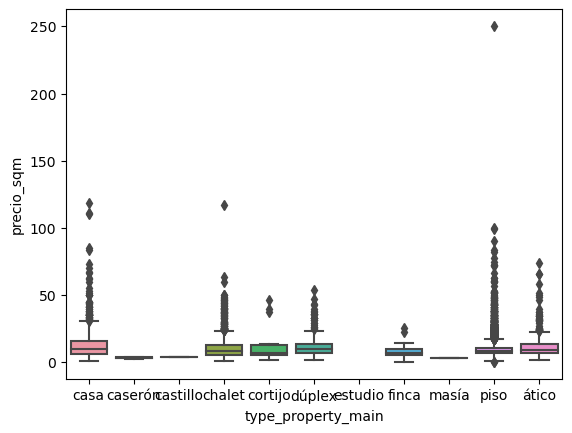

In [284]:
for zonei, zonedf in df_outliers.groupby([ "comunidad_autonoma"]):#.agg({"precio":[q1,q3]})
    sns.boxplot(data=zonedf, x="type_property_main", y="precio_sqm")
    break


<AxesSubplot: xlabel='type_property_main', ylabel='precio'>

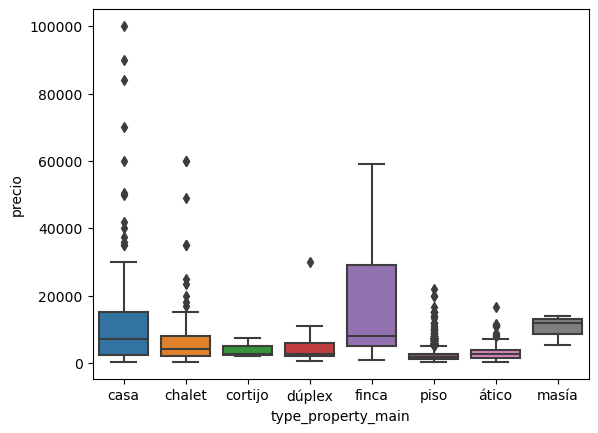

In [285]:
sns.boxplot(data=df_outliers[df_outliers["outliers_IQR"]==1], x ="type_property_main", y ="precio")

<AxesSubplot: xlabel='type_property_main', ylabel='precio'>

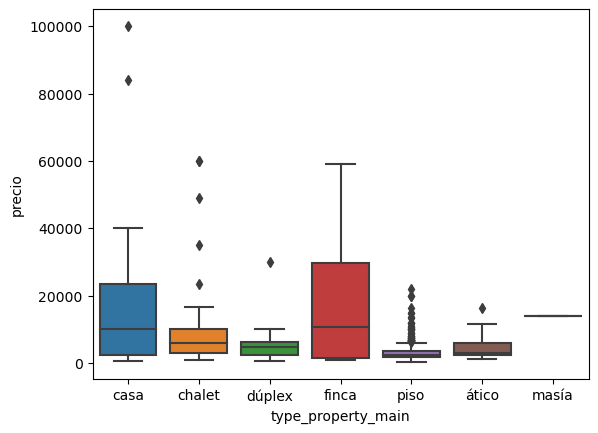

In [286]:
sns.boxplot(data=df_outliers[df_outliers["outliers_sigma"]==1], x ="type_property_main", y ="precio")

In [287]:
df_outliers.reset_index(inplace=True, drop=True)
df_outliers.head()

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec,precio_sqm,outliers_IQR,outliers_sigma
0,Almeria,andalucia,Casa o chalet independiente en Ciudad Quesada,900.0,2.0,140.0,1345,-1,-1,Ciudad Quesada,casa,indep,6.428571,0,0
1,Almeria,andalucia,Casa o chalet independiente en Playa de Ponien...,2200.0,3.0,278.0,1345,-1,-1,"Playa de Poniente, Benidorm",casa,indep,7.913669,0,0
2,Almeria,andalucia,Casa o chalet independiente en Urbanització Co...,799.0,3.0,75.0,1345,-1,-1,"Urbanització Copet, Coloma, La Nucia",casa,indep,10.653333,0,0
3,Almeria,andalucia,Casa o chalet independiente en avenida las Gol...,800.0,3.0,190.0,1345,-1,-1,"avenida las Golondrinas, Arboleas",casa,indep,4.210526,0,0
4,Almeria,andalucia,"Casa o chalet independiente en Atarazanas, 48,...",550.0,2.0,70.0,1345,-1,-1,"Atarazanas, 48, Cabo de Gata",casa,indep,7.857143,0,0


In [288]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46815 entries, 0 to 46814
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   provincia                    46814 non-null  object 
 1   comunidad_autonoma           46815 non-null  object 
 2   titulo                       46815 non-null  object 
 3   precio                       46813 non-null  float64
 4   habitaciones                 45213 non-null  float64
 5   metros                       45157 non-null  float64
 6   total_inmuebles_p_comunidad  46815 non-null  int64  
 7   ascensor                     46815 non-null  int64  
 8   additional_info              46815 non-null  int64  
 9   extract_address              46815 non-null  object 
 10  type_property_main           46815 non-null  object 
 11  type_property_sec            5837 non-null   object 
 12  precio_sqm                   45155 non-null  float64
 13  outliers_IQR    

In [289]:
df_outliers.to_csv("../output/clean_db.csv", index=False)